# Customer Behaviour Analysis

Customer Behavior Analysis is the process of examining how customers interact with a product, service, or platform to understand their actions, preferences, and decision-making processes.

We have a dataset that captures the behavior of e-commerce customers. The dataset contains the following columns:

User_ID: Unique identifier for each customer.
    
Gender: Gender of the customer (e.g., Male, Female).
    
Age: Age of the customer.
    
Location: Location of the customer.
    
Device_Type: Type of device used for browsing (e.g., Mobile, Tablet, Desktop).
    
Product_Browsing_Time: Amount of time spent browsing products (in minutes).
    
Total_Pages_Viewed: Total number of pages viewed during the browsing session.
    
Items_Added_to_Cart: Number of items added to the shopping cart.
    
Total_Purchases: Total number of purchases made.

In [49]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
cb=pd.read_csv(r'C:\Users\femif\Downloads\ecommerce_customer_data.csv')
cb

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2
...,...,...,...,...,...,...,...,...,...
495,496,Male,24,Mumbai,Tablet,40,45,0,0
496,497,Female,24,Hyderabad,Desktop,8,34,4,5
497,498,Male,19,Pune,Desktop,33,41,0,3
498,499,Male,28,Chennai,Desktop,6,32,7,4


In [51]:
#Dispaly the first few rows of the dataset
cb.head()

,User_ID,Gender,Age,Location,Device_Type,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
0,1,Female,23,Ahmedabad,Mobile,60,30,1,0
1,2,Male,25,Kolkata,Tablet,30,38,9,4
2,3,Male,32,Bangalore,Desktop,37,13,5,0
3,4,Male,35,Delhi,Mobile,7,20,10,3
4,5,Male,27,Bangalore,Tablet,35,20,8,2


In [52]:
#information abour the data
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User_ID                500 non-null    int64 
 1   Gender                 500 non-null    object
 2   Age                    500 non-null    int64 
 3   Location               500 non-null    object
 4   Device_Type            500 non-null    object
 5   Product_Browsing_Time  500 non-null    int64 
 6   Total_Pages_Viewed     500 non-null    int64 
 7   Items_Added_to_Cart    500 non-null    int64 
 8   Total_Purchases        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


In [53]:
#check for the null values
cb.isnull().sum()

User_ID                  0
Gender                   0
Age                      0
Location                 0
Device_Type              0
Product_Browsing_Time    0
Total_Pages_Viewed       0
Items_Added_to_Cart      0
Total_Purchases          0
dtype: int64

In [54]:
#check for the rows and columns
cb.shape

(500, 9)

In [55]:
#Gender
cb['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [56]:
#Location
cb['Location'].unique()

array(['Ahmedabad', 'Kolkata', 'Bangalore', 'Delhi', 'Pune', 'Mumbai',
       'Hyderabad', 'Chennai'], dtype=object)

In [57]:
#Device type
cb['Device_Type'].unique()

array(['Mobile', 'Tablet', 'Desktop'], dtype=object)

In [58]:
cb.groupby('Gender')['Device_Type'].value_counts()

Gender  Device_Type
Female  Mobile         83
        Desktop        82
        Tablet         74
Male    Mobile         95
        Tablet         89
        Desktop        77
Name: Device_Type, dtype: int64

<Axes: xlabel='Gender,Device_Type'>

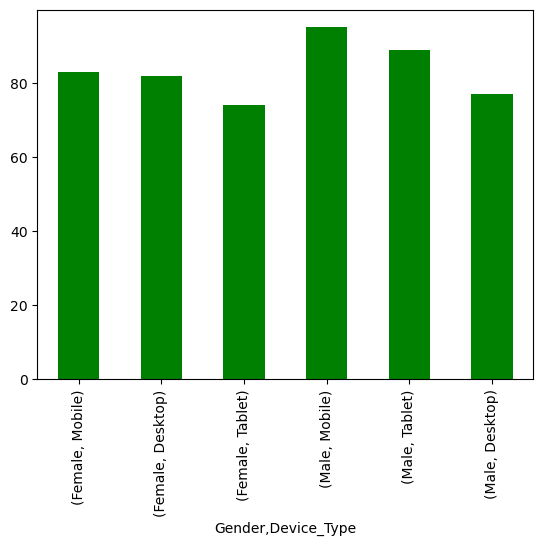

In [59]:
cb.groupby('Gender')['Device_Type'].value_counts().plot(kind='bar',color='green')

mobile is the most used device,in the gender category male is most used mobile

In [60]:
#describe the data
cb.describe()

,User_ID,Age,Product_Browsing_Time,Total_Pages_Viewed,Items_Added_to_Cart,Total_Purchases
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,26.276000,30.740000,27.182000,5.150000,2.464000
std,144.481833,5.114699,15.934246,13.071596,3.203127,1.740909
min,1.000000,18.000000,5.000000,5.000000,0.000000,0.000000
25%,125.750000,22.000000,16.000000,16.000000,2.000000,1.000000
50%,250.500000,26.000000,31.000000,27.000000,5.000000,2.000000
75%,375.250000,31.000000,44.000000,38.000000,8.000000,4.000000
max,500.000000,35.000000,60.000000,50.000000,10.000000,5.000000


In [61]:
#summary of non numeric column
categorical_summary = cb.describe(include='object')
categorical_summary

,Gender,Location,Device_Type
count,500,500,500
unique,2,8,3
top,Male,Kolkata,Mobile
freq,261,71,178


In [62]:
#Age distribution of data
fig = px.histogram(cb, x='Age', title='Distribution of Age')
fig.show()

21 years old are shown here as the highest count,

<Axes: >

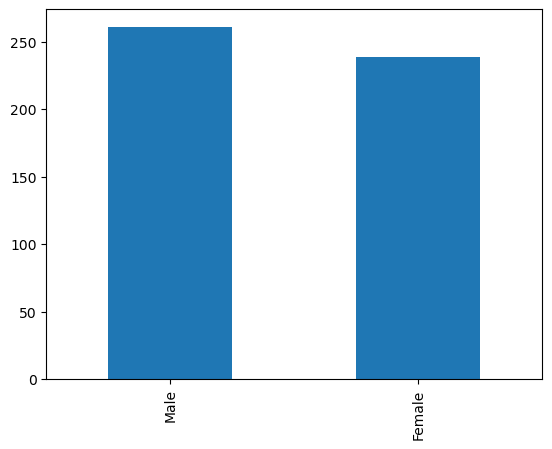

In [63]:
#Distribution of gender
cb['Gender'].value_counts().plot(kind='bar')

## Analyzing Customer Behaviour

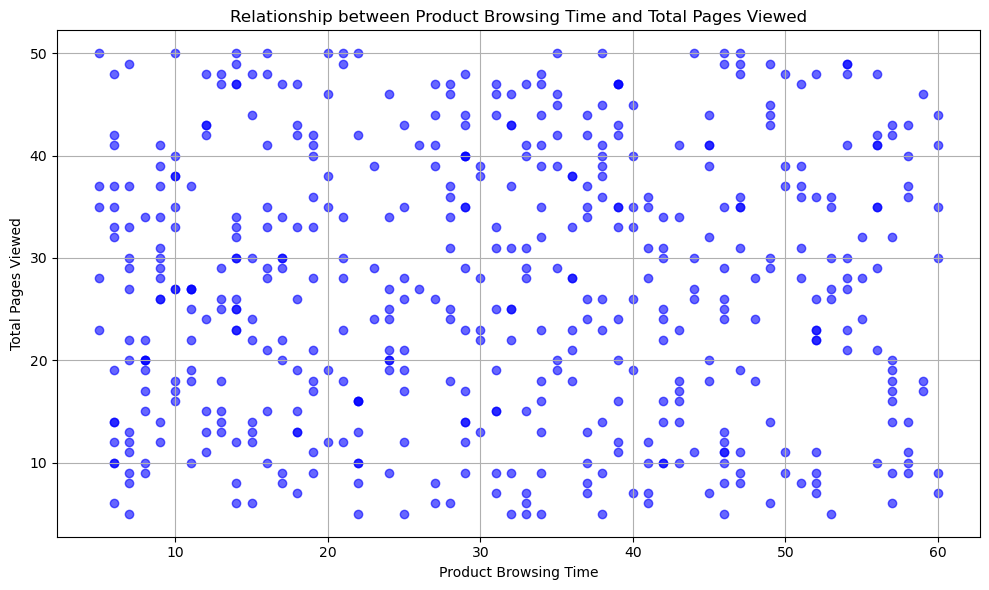

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(cb['Product_Browsing_Time'], cb['Total_Pages_Viewed'], color='blue', alpha=0.6)
plt.title('Relationship between Product Browsing Time and Total Pages Viewed')
plt.xlabel('Product Browsing Time')
plt.ylabel('Total Pages Viewed')
plt.grid(True)
plt.tight_layout()
plt.show()

The above scatter plot shows no consistent pattern or strong association between the time spent browsing products and the total number of pages viewed. It indicates that customers are not necessarily exploring more pages if they spend more time on the website, which might be due to various factors such as the website design, content relevance, or individual user preferences.

C:\Users\femif\AppData\Local\Temp\ipykernel_1604\222011730.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




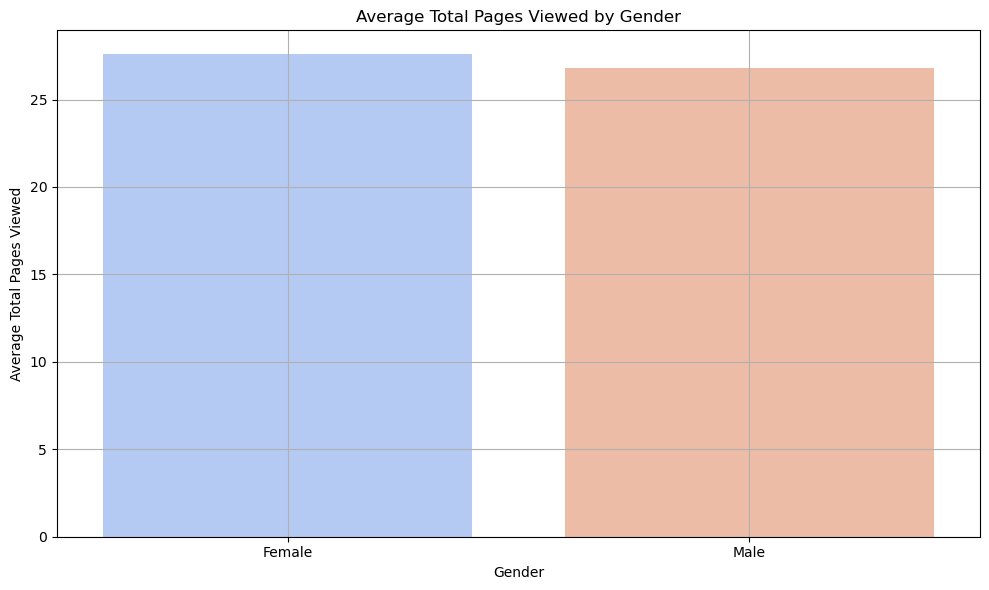

In [66]:
#Average Total Pages Viewed by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total_Pages_Viewed', data=cb, estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Total Pages Viewed by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Pages Viewed')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\femif\AppData\Local\Temp\ipykernel_1604\692288025.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




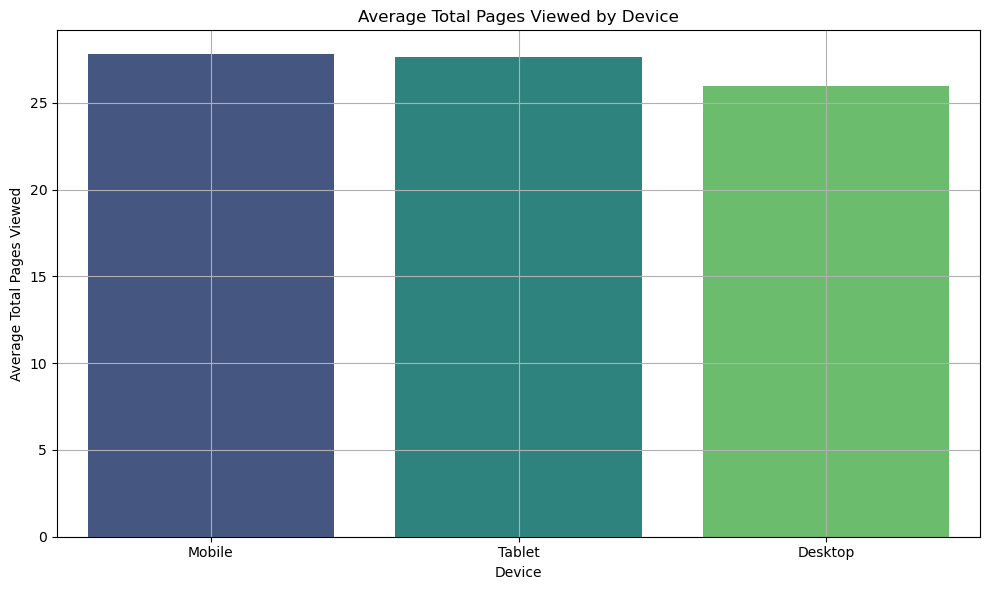

In [73]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Device_Type', y='Total_Pages_Viewed', data=cb, estimator='mean', ci=None, palette='viridis')
plt.title('Average Total Pages Viewed by Device')
plt.xlabel('Device')
plt.ylabel('Average Total Pages Viewed')
plt.grid(True)
plt.tight_layout()
plt.show()

 calculate the customer lifetime value and visualize segments based on the customer lifetime value:

In [77]:
cb['CLV'] = (cb['Total_Purchases'] * cb['Total_Pages_Viewed']) / cb['Age']

cb['Segment'] = pd.cut(cb['CLV'], bins=[1, 2.5, 5, float('inf')],
                         labels=['Low Value', 'Medium Value', 'High Value'])

segment_counts = cb['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

fig = px.bar(segment_counts, x='Segment', y='Count', 
             title='Customer Segmentation by CLV')
fig.update_xaxes(title='Segment')
fig.update_yaxes(title='Number of Customers')
fig.show()

Customer Behavior Analysis is a process that involves examining and understanding how customers interact with a business, product, or service. This analysis helps organizations make informed decisions, tailor their strategies, and enhance customer experiences